In [1]:
import  numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,minmax_scale
from sklearn import model_selection
from sklearn import metrics
%matplotlib inline

### Load the DataSet

In [2]:
df=pd.read_csv("E:/python basics/Residency 3 Enssembled learning/parkinsons.csv")
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

### Using univariate and bivariate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations?

#### For MDVP:Fo(Hz) :-Univatiate and bivariate analysis.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


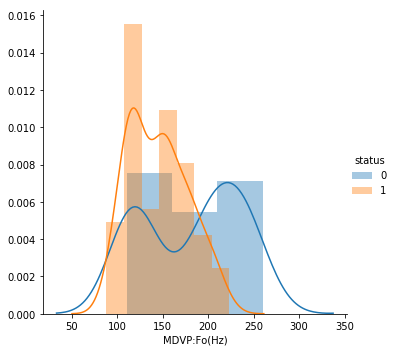

In [4]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"MDVP:Fo(Hz)") \
    .add_legend();
plt.show()

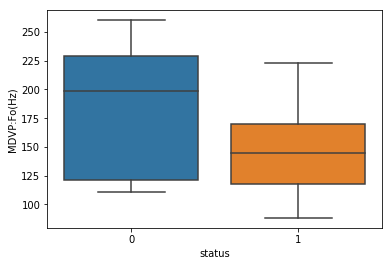

In [5]:
sns.boxplot(x='status',y='MDVP:Fo(Hz)',data=df)

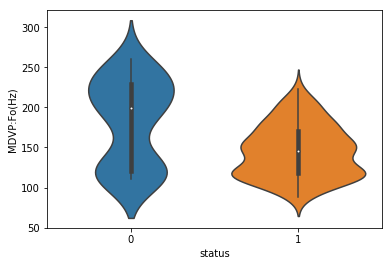

In [6]:
sns.violinplot(x='status',y='MDVP:Fo(Hz)',data=df)

#### Observations :


#####   it is observed that   MDVP:Fo(Hz) between 125 hz to 170 hz has parkinsons disease.

### For MDVP:Fhi(Hz) :-Univatiate and bivariate analysis.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


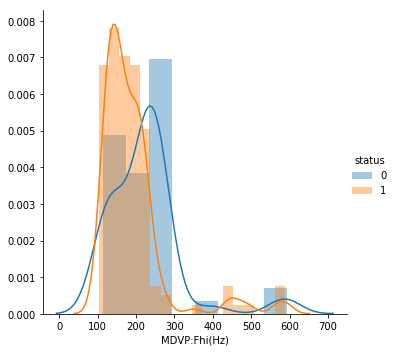

In [18]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"MDVP:Fhi(Hz)") \
    .add_legend();
plt.show()

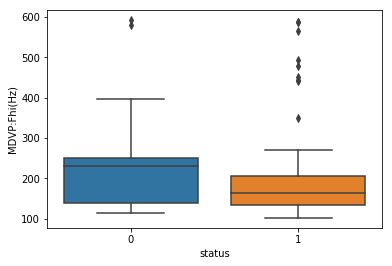

In [7]:
sns.boxplot(x='status',y='MDVP:Fhi(Hz)',data=df)

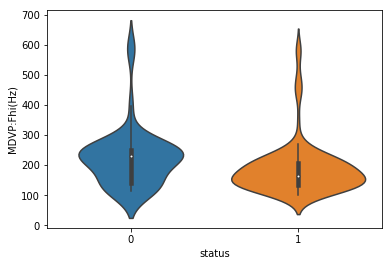

In [8]:
sns.violinplot(x='status',y='MDVP:Fhi(Hz)',data=df)

### Observations : 
#### it is observed that MDVP:Fhi(Hz)  between 100 hz to 200 hz has parkinsons disease.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


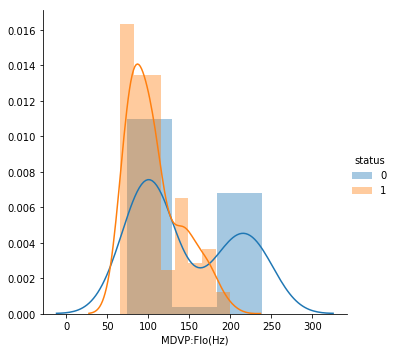

In [22]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"MDVP:Flo(Hz)") \
    .add_legend();
plt.show()

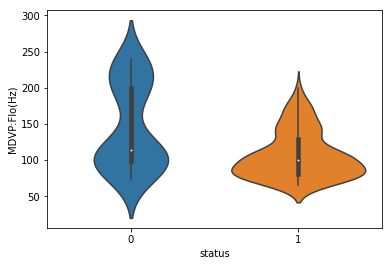

In [11]:
sns.violinplot(x='status',y='MDVP:Flo(Hz)',data=df)

### Observations : 
#### it is observed that MDVP:Jitter(%)  between 70 % to 125 % has parkinsons disease.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


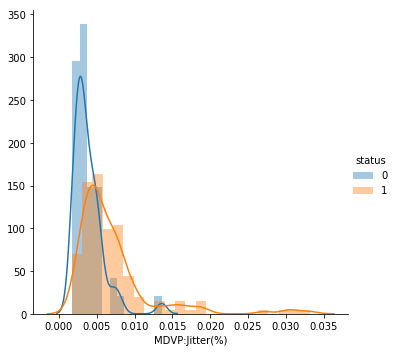

In [23]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"MDVP:Jitter(%)") \
    .add_legend();
plt.show()

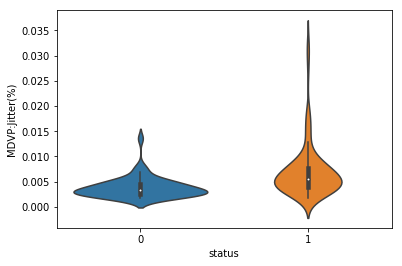

In [19]:
sns.violinplot(x='status',y='MDVP:Jitter(%)',data=df)

### Observations : 
#### it is observed that MDVP:Fhi(Hz)  between 100 hz to 200 hz has parkinsons disease.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


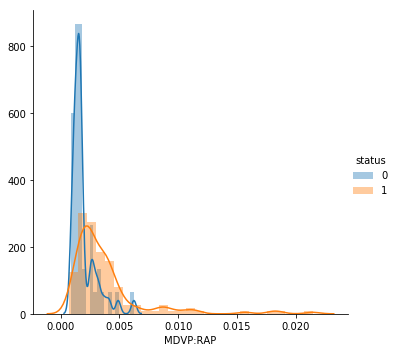

In [20]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"MDVP:RAP") \
    .add_legend();
plt.show()

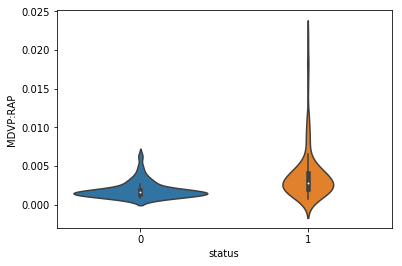

In [21]:
sns.violinplot(x='status',y='MDVP:RAP',data=df)

### Observations : 
#### it is observed that MDVP:RAP  between 0.002 to 0.005  has parkinsons disease.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


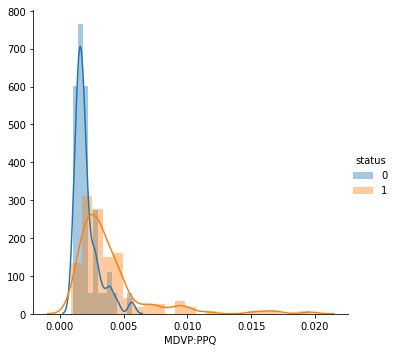

In [25]:
 sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"MDVP:PPQ") \
    .add_legend();
plt.show()

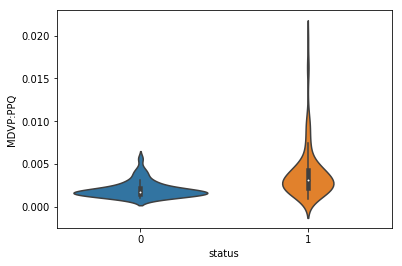

In [18]:
sns.violinplot(x='status',y='MDVP:PPQ',data=df)

### Observations : 
#### it is observed that MDVP:PPQ  between 0.001 to 0.004 hz has parkinsons disease.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


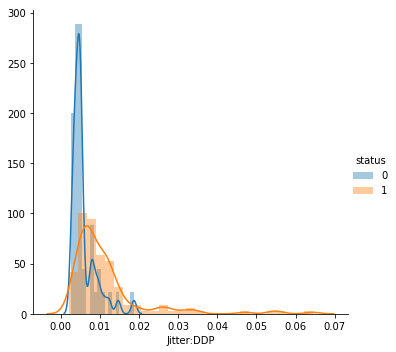

In [26]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"Jitter:DDP") \
    .add_legend();
plt.show()

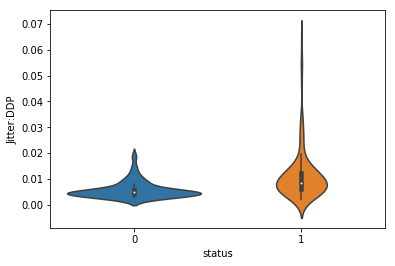

In [23]:
sns.violinplot(x='status',y='Jitter:DDP',data=df)

 ### Observations : 
#### it is observed that Jitter:DDP  between 0.005 to 0.015 has parkinsons disease.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


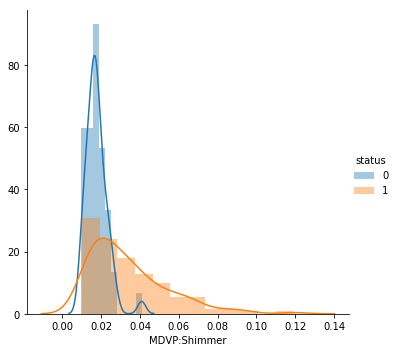

In [25]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"MDVP:Shimmer") \
    .add_legend();
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


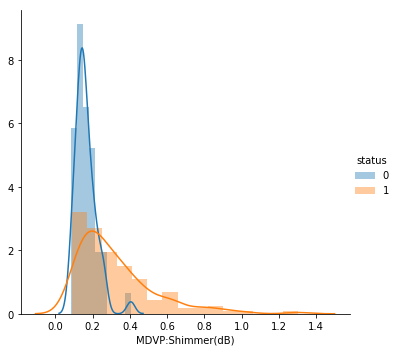

In [28]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"MDVP:Shimmer(dB)") \
    .add_legend();
plt.show()

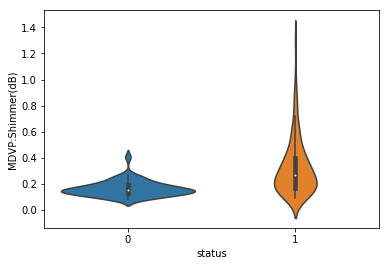

In [29]:
sns.violinplot(x='status',y='MDVP:Shimmer(dB)',data=df)

### Observations : 
#### it is observed that MDVP:Shimmer(dB)  between 0.1 db to 0.5 db has parkinsons disease.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


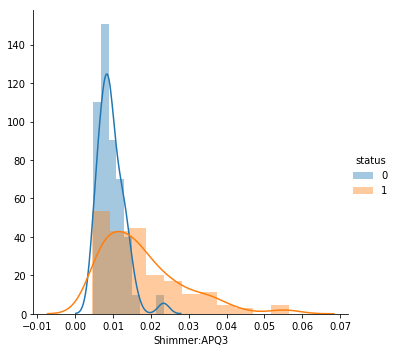

In [29]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"Shimmer:APQ3") \
    .add_legend();
plt.show()

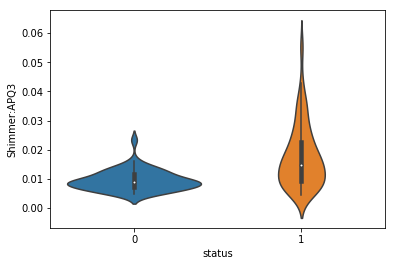

In [30]:
sns.violinplot(x='status',y='Shimmer:APQ3',data=df)

In [31]:
### Observations : 
#### it is observed that Shimmer:APQ3  between 0.01 to 0.025  has parkinsons disease.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


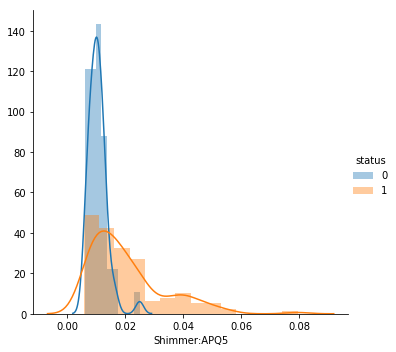

In [30]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"Shimmer:APQ5") \
    .add_legend();
plt.show()

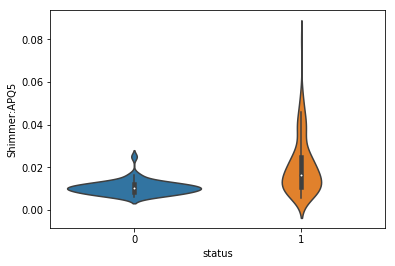

In [33]:
sns.violinplot(x='status',y='Shimmer:APQ5',data=df)

### Observations : 
#### it is observed that Shimmer:APQ5 between 0.01 to 0.03 has parkinsons disease.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


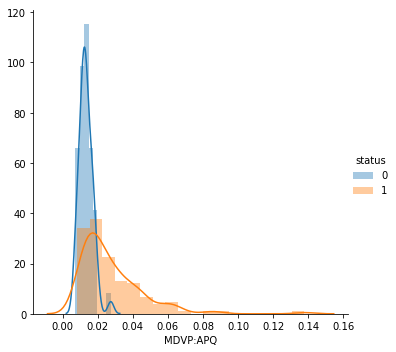

In [31]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"MDVP:APQ") \
    .add_legend();
plt.show()

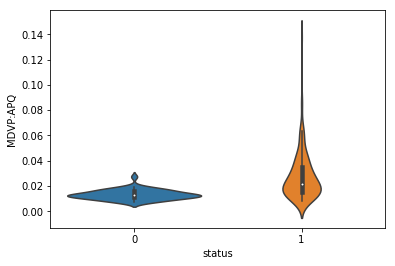

In [35]:
sns.violinplot(x='status',y='MDVP:APQ',data=df)

### Observations : 
#### it is observed that MDVP:APQ  between 0.01 to 0.04 has parkinsons disease.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


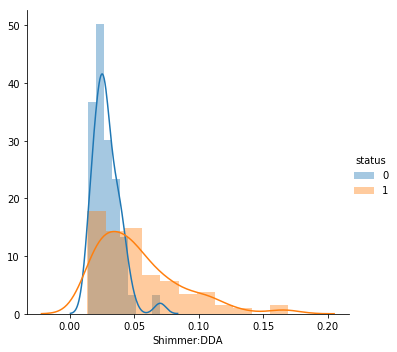

In [37]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"Shimmer:DDA") \
    .add_legend();
plt.show()

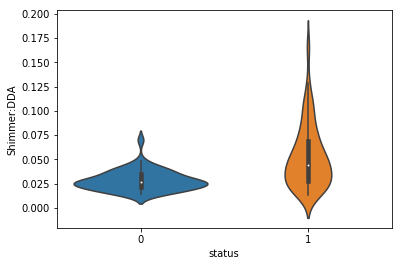

In [39]:
sns.violinplot(x='status',y='Shimmer:DDA',data=df)

### Observations : 
#### it is observed that Shimmer:DDA  between 0.025  to 0.075 has parkinsons disease.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


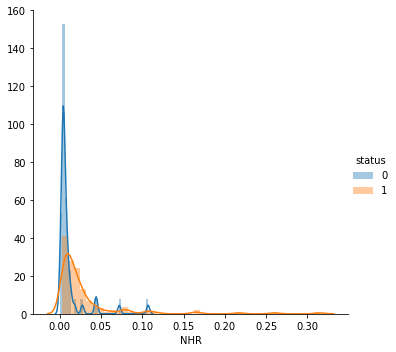

In [38]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"NHR") \
    .add_legend();
plt.show()

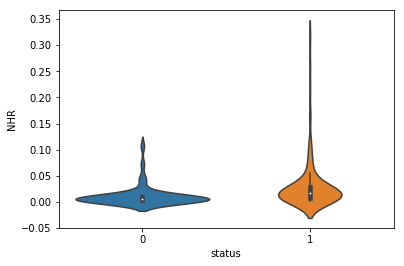

In [40]:
sns.violinplot(x='status',y='NHR',data=df)


In [41]:
### Observations : 
#### it is observed that between 0.00 to 0.04 has parkinsons disease.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


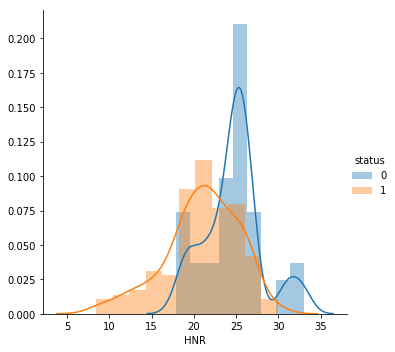

In [37]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"HNR") \
    .add_legend();
plt.show()

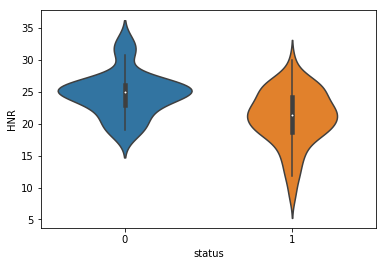

In [42]:
sns.violinplot(x='status',y='HNR',data=df)

In [43]:
### Observations : 
#### it is observed that HNR  between 18 to 25 has parkinsons disease.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


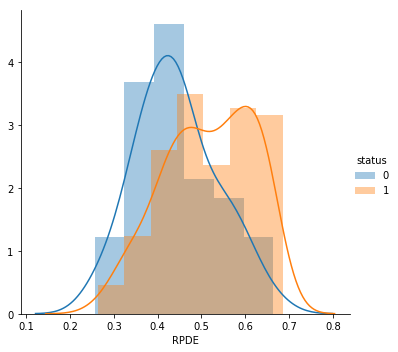

In [38]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"RPDE") \
    .add_legend();
plt.show()

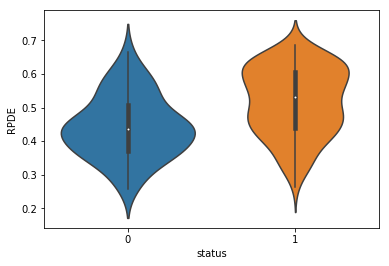

In [44]:
sns.violinplot(x='status',y='RPDE',data=df)

In [45]:
### Observations : 
2#### it is observed that RPDE  between 0.045 to 0.06 has parkinsons disease.

2

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


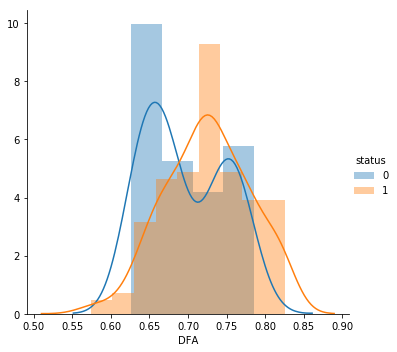

In [39]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"DFA") \
    .add_legend();
plt.show()

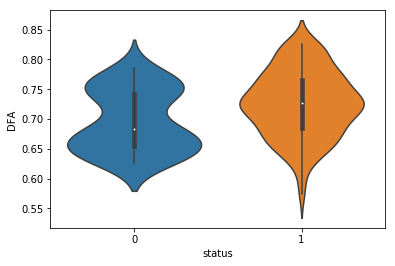

In [46]:
sns.violinplot(x='status',y='DFA',data=df)

In [47]:
### Observations : 
### it is observed that DFA between 0.655  to 0.0755 has parkinsons disease.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


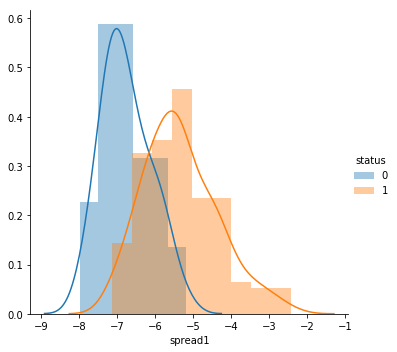

In [40]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"spread1") \
    .add_legend();
plt.show()

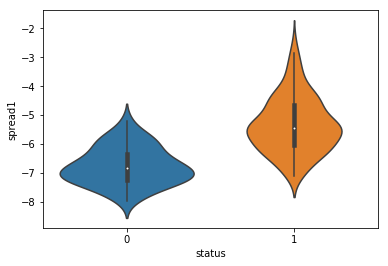

In [48]:
sns.violinplot(x='status',y='spread1',data=df)

In [49]:
 ### Observations : 
#### it is observed that spread1 in range -6 to -4.5 has parkinsons disease.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


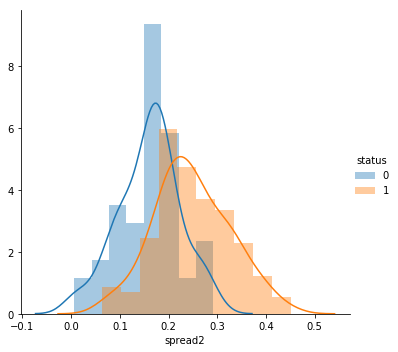

In [41]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"spread2") \
    .add_legend();
plt.show()

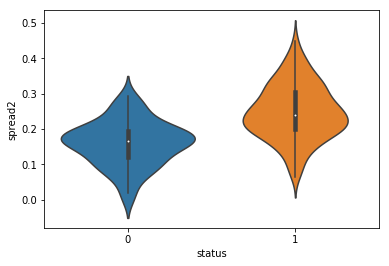

In [50]:
sns.violinplot(x='status',y='spread2',data=df)

In [51]:
Observation:
#### it is observed that spread2 between  0.2 to 0.3 has parkinsons disease.

SyntaxError: invalid syntax (<ipython-input-51-9e2b7e1c0890>, line 1)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


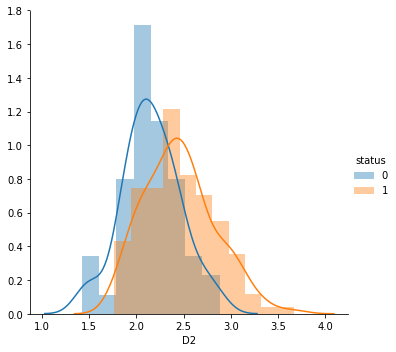

In [42]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"D2") \
    .add_legend();
plt.show()

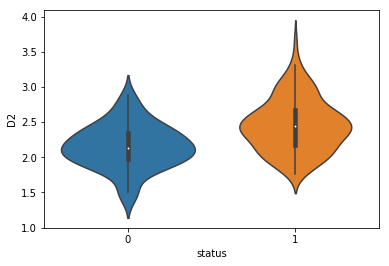

In [52]:
sns.violinplot(x='status',y='D2',data=df)



In [ ]:
 Observations : 
#### It is observed that D2 between 2.01 to 2.52 hz has parkinsons disease.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


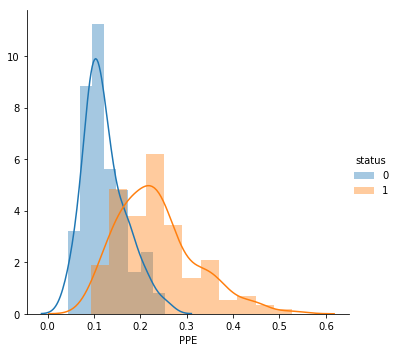

In [43]:
sns.FacetGrid(df,hue="status",size=5) \
    .map(sns.distplot,"PPE") \
    .add_legend();
plt.show()

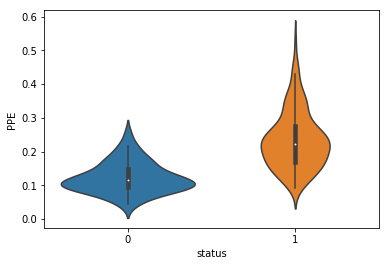

In [54]:
sns.violinplot(x='status',y='PPE',data=df)

In [55]:
### Observations : 
#### it is observed that PPE between 0.15 to 0.3 has parkinsons disease.

In [56]:
 df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [59]:
X=df.drop(['status','name'],axis=1)
y=df[['status']]

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0)

In [60]:
model = DecisionTreeClassifier(criterion = 'entropy',random_state=0)
model.fit(Xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [61]:
y_pred = model.predict(Xtest)

In [62]:
accu = model.score(Xtest,ytest)

In [63]:
print(accu)

0.8983050847457628


In [73]:
cm2=metrics.confusion_matrix(ytest,y_pred)
print(cm2)

[[13  0]
 [ 6 40]]


In [74]:
pd.crosstab(accu,y_pred)

col_0,0,1
row_0,,
0.898305,19,40


In [92]:
reg_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=8,min_samples_leaf=1,random_state=0)
reg_model.fit(Xtrain,ytrain)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [93]:
ypred2=reg_model.predict(Xtest)

In [94]:
reg_model.score(Xtest,ytest)

0.8983050847457628

In [95]:
cm3=metrics.confusion_matrix(ytest,ypred2)
print(cm3)

[[13  0]
 [ 6 40]]


## Observations:
#### there is no impact of regularization on model Accuracy.
#### and it does'nt seem that regularization parameter helped.

In [96]:
random_forest = RandomForestClassifier(n_estimators=231,criterion='entropy',random_state=0)

In [97]:
random_forest.fit(Xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=231, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [98]:
ypred3=random_forest.predict(Xtest)

In [99]:
random_forest.score(Xtest,ytest)

0.9661016949152542

#### The optimal number of tree that gives best result are 231

In [100]:
cm4=metrics.confusion_matrix(ytest,ypred3)
print(cm4)

[[12  1]
 [ 1 45]]


### Among three model random forest with optimal number of tree 231 has higher recall and precision rate